## Cell Model Passport: images summary

This notebook contains summary information about microscope images taken for some lines of the Cell Model Passport, hereinafter referred to as CMP. All the information displayed here are retrieved from `images_info_table.csv`. Look at `get_table.ipynb` notebbok to see how to generate it.

### Libraries    

In [1]:
# import pandas as pd
# import os
# from PIL import Image
# import numpy as np
# import glob
# import seaborn as sns
# import matplotlib.pyplot as plt

### Data path and parameter

In [1]:
PATH_info = '../data/images_info_table.csv'
PATH_plot = '../plots/'

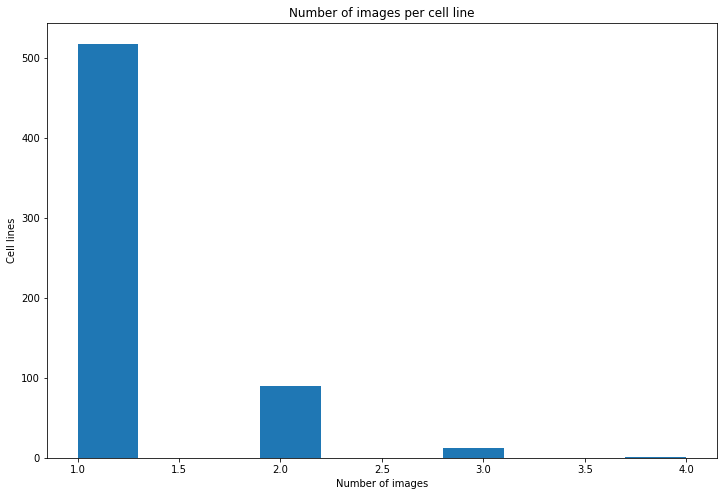

In [68]:
plt.figure(figsize=(12,8))
plt.hist(list(count.values()))
plt.title("Number of images per cell line")
plt.xlabel("Number of images")
plt.ylabel("Cell lines")
plt.savefig('ne.png')
plt.show()


In [67]:
plt.show()

In [97]:
all_img[all_img['Master Cell ID'].isin(masters)]

,Master Cell ID,SIDM,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,gender,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers
1,2,SIDM00420,SW1710,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Female,White,Unknown,NaN,909749,ACH-000566,SW1710_URINARY_TRACT,CVCL_1721,NaN,DSMZ:ACC-426
2,3,SIDM00841,SW620,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Male,White,Unknown,SW480 was derived from the primary adenocarcin...,905962,ACH-000651,SW620_LARGE_INTESTINE,CVCL_0547,NaN,ATCC:CCL-227
5,6,SIDM01205,TUR,TPA-U937-resistant,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Male,White,Unknown,TUR (TPA U937 Resistant) is a stably transfect...,909773,ACH-002314,TUR_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_1775,NaN,ATCC:CRL-2367
6,7,SIDM01193,U-118-MG,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Male,White,Unknown,"U-118 MG and U-138 MG have identical VNTR, sim...",687588,ACH-000040,U118MG_CENTRAL_NERVOUS_SYSTEM,CVCL_0633,NaN,ATCC:HTB-15
9,11,SIDM00302,KGN,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Female,Unknown,Unknown,NaN,924186,ACH-002149,KGN_OVARY,CVCL_0375,NaN,RIKEN:RCB1154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,2258,SIDM00253,NB6,SJNB-6;NB6-DH;N2307L,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,949173,ACH-002284,NB6_AUTONOMIC_GANGLIA,CVCL_8823,NaN,NaN
1097,2260,SIDM01095,SJRH30,RH30SJ;SJCRH30;RC13;RMS 13;RH-30,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Male,White,Unknown,NaN,909716,ACH-001189;ACH-001741;ACH-000833,SJRH30_SOFT_TISSUE,CVCL_0041,NaN,ATCC:CRL-2061
1098,2263,SIDM00994,ALL-SIL,SIL-ALL,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,1295740,ACH-000105,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_1805,NaN,DSMZ:ACC-511
1099,2264,SIDM00893,BT-20,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Female,White,Unknown,NaN,906801,ACH-000536,BT20_BREAST,CVCL_0178,NaN,ATCC:HTB-19


In [125]:
final = pd.DataFrame()
names = []

for im in im_list:
    im_id = im.split('/')[-1]
    
    im_id = im_id.strip('.jpg')
    
    #print (im_id)

    if ' (' in im_id:
        master = int(im_id.split(' ')[0])
    else:
        master = int(im_id.split('-')[0])
        
    c = len(final)
    
    tmp = all_img[all_img['Master Cell ID']==master]    
    final = final.append(tmp, ignore_index=True)
    
    d = len(final)
    
    if c<d:
        names.append(im_id)

     
    
final

,Master Cell ID,SIDM,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,gender,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers
0,1877,SIDM00423,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573
1,1476,SIDM01081,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624
2,1068,SIDM00043,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown
3,2195,SIDM00585,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Male,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403
4,162,SIDM00540,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Male,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,706,SIDM00592,HO-1-N-1,Nakata-1,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,NaN,924111,ACH-002244,HO1N1_UPPER_AERODIGESTIVE_TRACT,CVCL_1284,NaN,JCRB:JCRB0831
732,153,SIDM01104,SK-MEL-31,AX-Mel,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Female,Unknown,Unknown,NaN,909727,ACH-000640,SKMEL31_SKIN,CVCL_0600,NaN,ATCC:HTB-73
733,1875,SIDM00654,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Female,Unknown,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853
734,2138,SIDM00278,EC-GI-10,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Male,East Asian,Unknown,NaN,753555,ACH-000305,ECGI10_OESOPHAGUS,CVCL_1187,NaN,RIKEN:RCB0774


In [126]:
final['im_id']=np.asanyarray(names)

In [115]:
len(names)

736

In [117]:
final

,Master Cell ID,SIDM,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,im_id
0,1877,SIDM00423,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573,1877-8278
1,1476,SIDM01081,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,1476-8001
2,1068,SIDM00043,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown,1068-8758
3,2195,SIDM00585,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,2195-8403
4,162,SIDM00540,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,706,SIDM00592,HO-1-N-1,Nakata-1,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,924111,ACH-002244,HO1N1_UPPER_AERODIGESTIVE_TRACT,CVCL_1284,NaN,JCRB:JCRB0831,706-9149
732,153,SIDM01104,SK-MEL-31,AX-Mel,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,909727,ACH-000640,SKMEL31_SKIN,CVCL_0600,NaN,ATCC:HTB-73,153
733,1875,SIDM00654,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853,1875-8232
734,2138,SIDM00278,EC-GI-10,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,753555,ACH-000305,ECGI10_OESOPHAGUS,CVCL_1187,NaN,RIKEN:RCB0774,2138-8023


In [128]:
final

,Master Cell ID,SIDM,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,...,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,im_id
0,1877,SIDM00423,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573,1877-8278
1,1476,SIDM01081,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,1476-8001
2,1068,SIDM00043,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown,1068-8758
3,2195,SIDM00585,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,2195-8403
4,162,SIDM00540,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,706,SIDM00592,HO-1-N-1,Nakata-1,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,924111,ACH-002244,HO1N1_UPPER_AERODIGESTIVE_TRACT,CVCL_1284,NaN,JCRB:JCRB0831,706-9149
732,153,SIDM01104,SK-MEL-31,AX-Mel,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,909727,ACH-000640,SKMEL31_SKIN,CVCL_0600,NaN,ATCC:HTB-73,153
733,1875,SIDM00654,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853,1875-8232
734,2138,SIDM00278,EC-GI-10,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,...,East Asian,Unknown,NaN,753555,ACH-000305,ECGI10_OESOPHAGUS,CVCL_1187,NaN,RIKEN:RCB0774,2138-8023


In [129]:
final.to_csv('all_final.csv')

### Dictionary, MasterCellID to tissue

In [8]:
master_to_tissue = dict(zip(img_info['Master Cell ID'], img_info['tissue']))

In [9]:
master_to_SIDM = dict(zip(img_info['Master Cell ID'], img_info['SIDM']))

In [10]:
master_to_type = dict(zip(img_info['Master Cell ID'], img_info['cancer_type']))

In [11]:
print(master_to_tissue[1786], master_to_SIDM[1786], master_to_type[1786])

Breast SIDM01056 Breast Carcinoma


### Loding images

#### Preprocessing
All the images are converted from .tif to .jpg to save space (aprox 1/35)

```
from PIL import Image
import glob

for name in glob.glob('*.tif'):
    im = Image.open(name)
    name = str(name).rstrip(".tif")
    im.save(name + '.jpg', 'JPEG')
```


### Importing one image, get pixel info and associate it to cell line and tissue

In [211]:
img = Image.open('data/images_jpeg/1149.jpg').convert('L')

#to visualise the image
#img.show()
#and get basic info 
print(img.format, img.size, img.mode)

None (2048, 1536) L


In [261]:
#image to arry of pixel intensty
im_arr = np.array(img)
print(im_arr.shape)

#array to flattened array
im_flat = im_arr.flatten()
print(im_flat.shape)

(1536, 2048)
(3145728,)


In [260]:
#array to flattened and normalised (0-1) array
norm = im_flat.astype('float32')/255.0

**Now loop on all images**

In [84]:
img_db = pd.DataFrame(columns=['im_id','SIDM','tissue','cancer_type'])

for filename in os.listdir(PATH_img):  
    if '.jpg' in filename:
    
        new_row = []

        im_id = filename.strip('.jpg')

        if ' (' in im_id:
            master = int(im_id.split(' ')[0])
        else:
            master = int(im_id.split('-')[0])  

        if master in master_to_SIDM.keys():
            SIDM = master_to_SIDM[master]
            tissue = master_to_tissue[master]
            cancer_type = master_to_type[master]
        else:
            SIDM = 'NA'
            tissue = 'NA'
            cancer_type = 'NA'
            
        new_row = pd.Series([im_id, SIDM, tissue, cancer_type],index=['im_id','SIDM','tissue','cancer_type'])
            

#         img = Image.open(PATH_test+filename).convert('L')
#         im_arr = np.array(img)
#         im_flat = im_arr.flatten()
#         im_norm = im_flat.astype('float32')/255.0
#         im_norm_series = pd.Series(im_norm, index=list(range(len(im_norm))))
        

#         new_row = pd.concat([new_row,im_norm_series])
        
        img_db = img_db.append(new_row, ignore_index=True)  
     
img_db


,im_id,SIDM,tissue,cancer_type
0,1877-8278,SIDM00423,Haematopoietic and Lymphoid,B-Cell Non-Hodgkin's Lymphoma
1,1476-8001,SIDM01081,Head and Neck,Oral Cavity Carcinoma
2,1068-8758,SIDM00043,Head and Neck,Head and Neck Carcinoma
3,2195-8403,SIDM00585,Liver,Hepatocellular Carcinoma
4,162,SIDM00540,Head and Neck,Oral Cavity Carcinoma
...,...,...,...,...
733,706-9149,SIDM00592,Head and Neck,Oral Cavity Carcinoma
734,153,SIDM01104,Skin,Melanoma
735,1875-8232,SIDM00654,Lung,Small Cell Lung Carcinoma
736,2138-8023,SIDM00278,Esophagus,Esophageal Squamous Cell Carcinoma


In [85]:
null_data = img_db[img_db.tissue=='NA']

In [87]:
null_data

,im_id,SIDM,tissue,cancer_type
475,522,NA,NA,NA
481,338-7838,NA,NA,NA


In [88]:
img_db.to_csv('images_info.csv', index=False )

In [89]:
tissue_df = pd.DataFrame.from_dict(dict(img_db.tissue.value_counts()),orient='index')

In [90]:
tissue_df.rename(columns = {0:'img_count'}, inplace = True)

In [91]:
tissue_df

,img_count
Lung,150
Haematopoietic and Lymphoid,122
Breast,57
Large Intestine,42
Skin,41
Ovary,40
Central Nervous System,37
Peripheral Nervous System,27
Bone,26
Head and Neck,24


Text(0.5, 1.0, 'Number of images per tissue type')

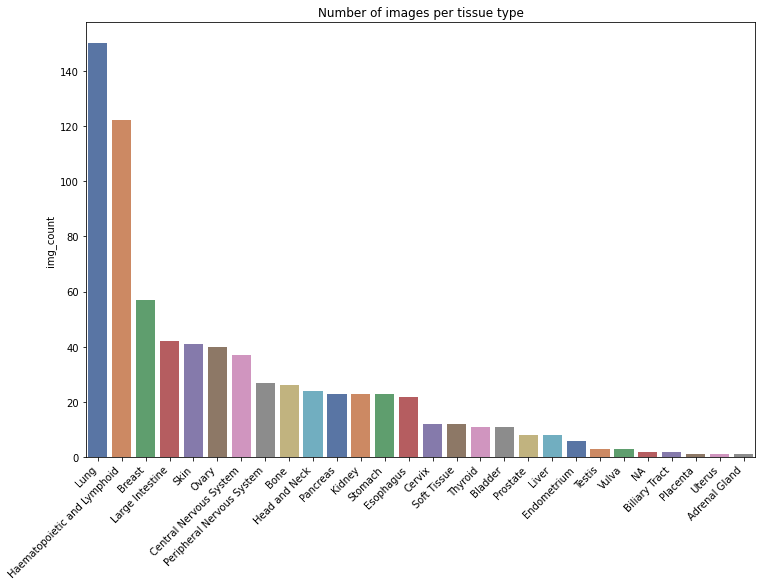

In [92]:
fig_dims = (12, 8)

fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.barplot(x = tissue_df.index, 
                    y = "img_count", 
                    ax=ax, 
                    data=tissue_df, 
                    palette="deep")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Number of images per tissue type')

### Alternative from the original dataframe using countplot

[Text(0, 0, 'Haematopoietic and Lymphoid'),
 Text(0, 0, 'Head and Neck'),
 Text(0, 0, 'Liver'),
 Text(0, 0, 'Thyroid'),
 Text(0, 0, 'Bone'),
 Text(0, 0, 'Breast'),
 Text(0, 0, 'Stomach'),
 Text(0, 0, 'Lung'),
 Text(0, 0, 'Ovary'),
 Text(0, 0, 'Prostate'),
 Text(0, 0, 'Large Intestine'),
 Text(0, 0, 'Central Nervous System'),
 Text(0, 0, 'Kidney'),
 Text(0, 0, 'Soft Tissue'),
 Text(0, 0, 'Skin'),
 Text(0, 0, 'Peripheral Nervous System'),
 Text(0, 0, 'Esophagus'),
 Text(0, 0, 'Cervix'),
 Text(0, 0, 'Biliary Tract'),
 Text(0, 0, 'Pancreas'),
 Text(0, 0, 'Bladder'),
 Text(0, 0, 'Endometrium'),
 Text(0, 0, 'Vulva'),
 Text(0, 0, 'Testis'),
 Text(0, 0, 'NA'),
 Text(0, 0, 'Adrenal Gland'),
 Text(0, 0, 'Uterus'),
 Text(0, 0, 'Placenta')]

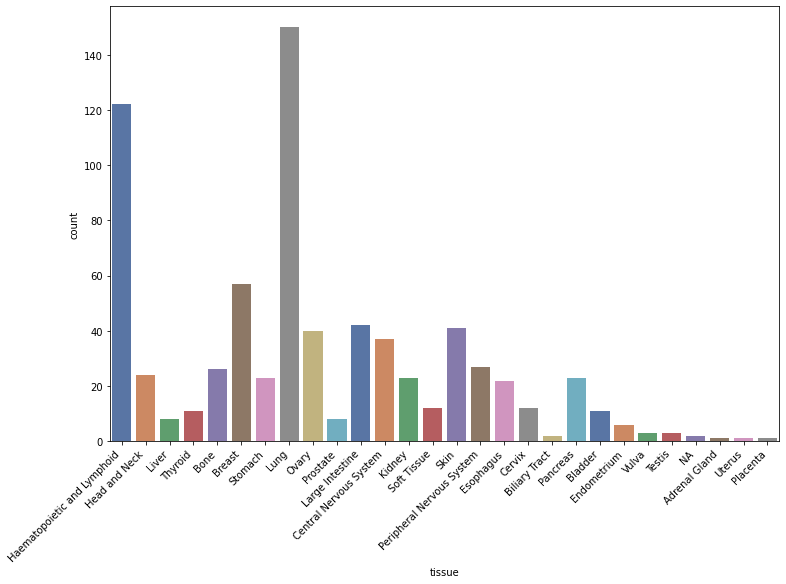

In [93]:
fig_dims = (12, 8)

fig, ax = plt.subplots(figsize=fig_dims)


chart = sns.countplot(x="tissue",
                      data=img_db,
                      palette="deep",
                      dodge=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')



### Let's look at cancer type

In [94]:
cancer_df = pd.DataFrame.from_dict(dict(img_db.cancer_type.value_counts()),orient='index')

In [95]:
cancer_df.rename(columns = {0:'img_count'}, inplace = True)

In [407]:
cancer_df

,img_count
Small Cell Lung Carcinoma,59
Non-Small Cell Lung Carcinoma,58
Breast Carcinoma,57
Colorectal Carcinoma,42
Melanoma,41
Ovarian Carcinoma,39
Other Solid Carcinomas,33
B-Cell Non-Hodgkin's Lymphoma,29
Neuroblastoma,27
Glioblastoma,24


Text(0.5, 1.0, 'Number of images per cancer type')

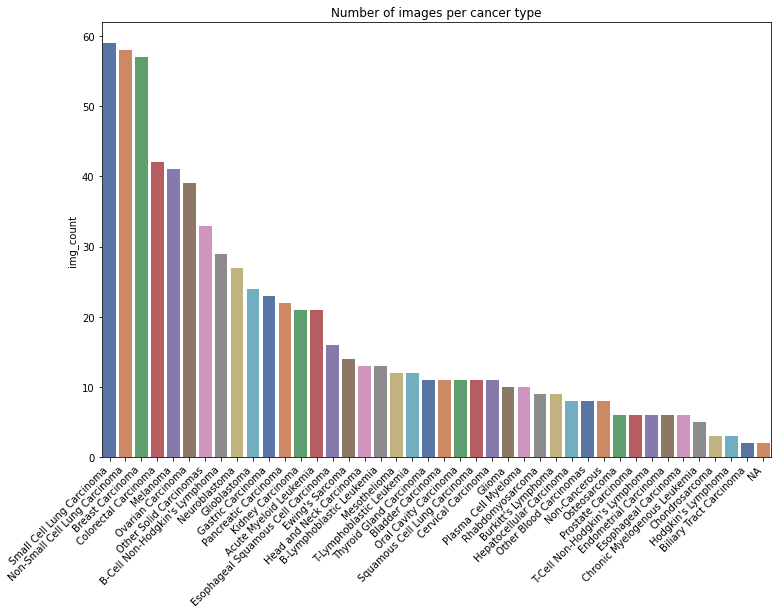

In [410]:
fig_dims = (12, 8)

fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.barplot(x = cancer_df.index, 
                    y = "img_count", 
                    ax=ax, 
                    data=cancer_df, 
                    palette="deep")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Number of images per cancer type')

In [5]:
today = pd.read_csv('../data/images_info_table.csv')

ParserError: Error tokenizing data. C error: Expected 52 fields in line 36, saw 53


In [4]:
today 

,im_id,Master Cell ID,SIDM,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,...,gender,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers
0,1877-8278,1877,SIDM00423,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573
1,1476-8001,1476,SIDM01081,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,...,Male,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624
2,1068-8758,1068,SIDM00043,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown
3,2195-8403,2195,SIDM00585,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,...,Male,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403
4,162,162,SIDM00540,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,...,Male,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,706-9149,706,SIDM00592,HO-1-N-1,Nakata-1,Cell Line,Adherent,NaN,NaN,NaN,...,Unknown,Unknown,Unknown,NaN,924111,ACH-002244,HO1N1_UPPER_AERODIGESTIVE_TRACT,CVCL_1284,NaN,JCRB:JCRB0831
732,153,153,SIDM01104,SK-MEL-31,AX-Mel,Cell Line,Adherent,NaN,NaN,NaN,...,Female,Unknown,Unknown,NaN,909727,ACH-000640,SKMEL31_SKIN,CVCL_0600,NaN,ATCC:HTB-73
733,1875-8232,1875,SIDM00654,NCI-H1048,NaN,Cell Line,Adherent,NaN,NaN,NaN,...,Female,Unknown,Unknown,NaN,687995,ACH-000866,NCIH1048_LUNG,CVCL_1453,NaN,ATCC:CRL-5853
734,2138-8023,2138,SIDM00278,EC-GI-10,NaN,Cell Line,Adherent,NaN,NaN,NaN,...,Male,East Asian,Unknown,NaN,753555,ACH-000305,ECGI10_OESOPHAGUS,CVCL_1187,NaN,RIKEN:RCB0774
